## Cálculo Numérico - Exercícios Propostos - Sistemas Não-Lineares
Maitê Luisa da Silva

In [1]:
import numpy as np
from IPython.display import display, Image

1. O problema do circuito com diodo apresentado no capítulo 4 pode ser equacionado por um sistema não linear da seguinte forma:

                            f1(Id, Vd) = ICR*(e^((Vd)/(nkT/q))-1) - Id
                            f2(Id, Vd) = (V-Vd)/R - Id
                            
onde Id é a corrente no diodo e Vd é a tensão no diodo. Admitindo um diodo 1N4001 com ICR = 31,9824 nA, n = 2, k = 1,3806 x 10^−23J/K, T = 300K (26,85 °C) e q = 1,6022 x 10^-19 C, encontre Id e Vd.

V = 24 V, R = 10 ohm.

In [2]:
ICR = 31.9824*10**-9
n = 2
k = 1.3806*10**-23
T = 300
q = 1.6022*10**-19
V = 24
R = 10

x = [ 2, 1]

iter = 0
maxit = 500
es = 0.01

while True:
    F = np.array([ICR*(np.exp(x[1]/(n*k*T/q))-1) - x[0],
                  (V - x[1])/R - x[0]])      # Matriz de funções
    J = np.array([[-1,  ICR*(np.exp(x[1]/(n*k*T/q))-1)/(n*k*T/q)],
         [-1 ,  -1/R ]]) 
    dx = np.linalg.lstsq(J,F,rcond=None)[0]
    x = x - dx
    iter += 1
    ea = max(abs(dx/x))
    if iter >= maxit or ea <= es:
        print(f'Com {iter} iterações: \n x = \n {x}')
        break


Com 3 iterações: 
 x = 
 [2.3064166  0.93583401]


2. O problema de fluxo de potência num sistema elétrico de três barras é apresentado na forma de diagrama unifilar e seu circuito equivalente. As admitâncias y possuem valor de 1 + j1 pu. Admitindo que as correntes nas barras sejam iguais a 1 pu, determine as tensões.

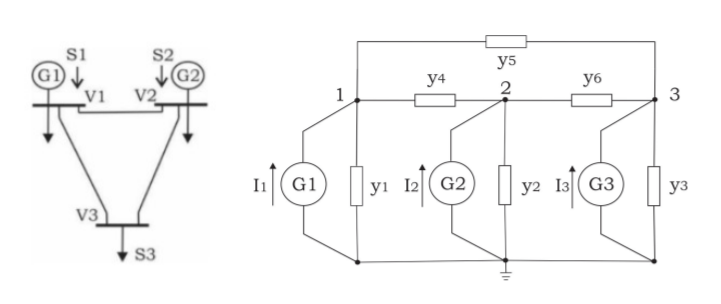

In [3]:
display(Image(filename='circuito3.PNG'))

In [4]:
#Decomposição LU

import numpy as np 


def LU_Decomposition_method(A, b):  # cria-se a função do método
    m = len(A)
    y = np.zeros(m)
    x = np.zeros(m)
    U = A
    L = np.zeros([m, m])
    for k in range(0, m):
        for r in range(0, m):
            if (k == r):
                L[k, r] = 1
            if (k < r):
                factor = (A[r, k]/A[k, k])
                L[r, k] = factor
                for c in range(0, m):
                    U[r, c] = A[r, c] - (factor * A[k, c])
    A = np.zeros([m, m])
    for r in range(0, m):
        for c in range(0, m):
            for k in range(0, m):
                A[r, c] += (L[r, k] * U[k, c])
    print('A')
    print(A)
    print('L')
    print(L)
    print()
    print('U')
    print(U)
    # RESOLUÇÃO DAS EQUAÇÕES MATRICIAIS
    ###################################
    y = np.linalg.solve(L, b)
    x = np.linalg.solve(U, y)
    ###################################
    f = 'SOLUÇÃO DO SISTEMA'
    print('-'*(len(f)+32))
    print(f'{f:^50}')
    print('-'*(len(f)+32))
    print('x =')
    print(x)
    print('Onde: ')
    for c in range(0, len(x)):
        print(f'\t x[{c}] = {x[c]} \n')

In [5]:
A = np.array([[complex(3,3), complex(-1,-1), complex(-1,-1)],
              [complex(-1,-1), complex(3,3), complex(-1,-1)],
              [complex(-1,-1), complex(-1,-1), complex(3,3)]],dtype='complex_')


b = np.array([complex(1,0), complex(1,0) ,complex(1,0)],dtype='complex_')

LU_Decomposition_method(A, b)

A
[[ 3. -1. -1.]
 [-1.  3. -1.]
 [-1. -1.  3.]]
L
[[ 1.          0.          0.        ]
 [-0.33333333  1.          0.        ]
 [-0.33333333 -0.5         1.        ]]

U
[[ 3.        +3.j         -1.        -1.j         -1.        -1.j        ]
 [ 0.        +0.j          2.66666667+2.66666667j -1.33333333-1.33333333j]
 [ 0.        +0.j          0.        +0.j          2.        +2.j        ]]
--------------------------------------------------
                SOLUÇÃO DO SISTEMA                
--------------------------------------------------
x =
[0.5-0.5j 0.5-0.5j 0.5-0.5j]
Onde: 
	 x[0] = (0.5-0.5j) 

	 x[1] = (0.5-0.5j) 

	 x[2] = (0.5-0.5j) 



<ipython-input-4-5ca3bf77e6f3>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  L[r, k] = factor
<ipython-input-4-5ca3bf77e6f3>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  A[r, c] += (L[r, k] * U[k, c])


In [6]:
from numpy import array, zeros

def seidel(a, x ,b):
    #Finding length of a(3) 
    maxit = 500
    es=0.0001
    iter = 0
    n = len(a)
    er = zeros(n)
    # for loop for 3 times as to calculate x, y , z

    while True:
        for j in range(0, n):        
            # temp variable d to store b[j]
            d = b[j]                  
          
            # to calculate respective xi, yi, zi
            for i in range(0, n):     
                if(j != i):
                    d-=a[j][i] * x[i]
            # updating the value of our solution
            x[j] = d / a[j][j]
            xv = x[j-1]
            if x[j] != 0:
                er[j] = abs((x[j] - xv)/x[j])
        # returning our updated solution               
        iter = iter+1
        if max(er)<=es or iter >= maxit:
            break
    print(f'Com {iter} iterações: \n x = \n {x}')
    print(f'erro = {er}')

In [7]:
A = array([[complex(3,3), complex(-1,-1), complex(-1,-1)],
              [complex(-1,-1), complex(3,3), complex(-1,-1)],
              [complex(-1,-1), complex(-1,-1), complex(3,3)]],dtype='complex_')


b = array([complex(1,0), complex(1,0) ,complex(1,0)],dtype='complex_')
x = [0, 0, 0] 


seidel(A,x,b)

Com 11 iterações: 
 x = 
 [(0.49987413096140326-0.49987413096140326j), (0.4999033839478276-0.4999033839478276j), (0.4999258383030769-0.4999258383030769j)]
erro = [7.62393510e-05 5.85172803e-05 4.49153725e-05]
